In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## To print everything in a cell, not just the last print statement ##
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('application_train.csv', header=0)

In [3]:
credit_and_loan_df = pd.DataFrame(data={'loan_paid_status': df['TARGET'], 
                                     'AMT_CREDIT': df['AMT_CREDIT'] })

In [4]:
credit_and_loan_df['AMT_CREDIT_BINNED'] = pd.cut(credit_and_loan_df['AMT_CREDIT'], 
                                         bins = np.linspace(min(credit_and_loan_df['AMT_CREDIT']), 
                                                            max(credit_and_loan_df['AMT_CREDIT']), num = 100),
                                                retbins=False)

In [5]:
credit_and_loan_df

,loan_paid_status,AMT_CREDIT,AMT_CREDIT_BINNED
0,1,406597.5,"(368636.364, 409090.909]"
1,0,1293502.5,"(1258636.364, 1299090.909]"
2,0,135000.0,"(125909.091, 166363.636]"
3,0,312682.5,"(287727.273, 328181.818]"
4,0,513000.0,"(490000.0, 530454.545]"
...,...,...,...
307506,0,254700.0,"(247272.727, 287727.273]"
307507,0,269550.0,"(247272.727, 287727.273]"
307508,0,677664.0,"(651818.182, 692272.727]"
307509,1,370107.0,"(368636.364, 409090.909]"


In [6]:
credit_and_loan_df = credit_and_loan_df.groupby(['AMT_CREDIT_BINNED', 'loan_paid_status']).size().to_frame()
credit_and_loan_df.reset_index(inplace=True)
credit_and_loan_df.set_index('AMT_CREDIT_BINNED', inplace=True)
integer_intervals = list(map(lambda interval: (interval.left,interval.right), credit_and_loan_df.index))
credit_and_loan_df['integer_intervals'] = list(map(lambda interval: str(interval[0]) + '-' + str(interval[1]), 
                                                   integer_intervals))
credit_and_loan_df.reset_index(inplace=True)
credit_and_loan_df = credit_and_loan_df.drop(['AMT_CREDIT_BINNED'], axis=1)
credit_and_loan_df.set_index('integer_intervals', inplace=True)
credit_and_loan_df = credit_and_loan_df.rename(columns={0: "count"})
credit_and_loan_df

,loan_paid_status,count
integer_intervals,,
45000.0-85454.545,0,3384
45000.0-85454.545,1,188
85454.545-125909.091,0,6162
85454.545-125909.091,1,415
125909.091-166363.636,0,11738
...,...,...
3564545.455-3605000.0,0,2
3847727.273-3888181.818,0,1
3928636.364-3969090.909,0,1


In [7]:
def f(interval):
    class0, class1 = 0, 0
    sub_df = credit_and_loan_df.loc[interval]
    if np.isscalar(sub_df[sub_df["loan_paid_status"] == 1]):
        class0 = class0 + sub_df[sub_df["loan_paid_status"] == 0]
        class1 = class1 + sub_df[sub_df["loan_paid_status"] == 1]
    else:
        class0 = class0 + int(sub_df[sub_df["loan_paid_status"] == 0]['count'])
        class1 = class1 + int(sub_df[sub_df["loan_paid_status"] == 1]['count'])
    return (class0+class1, class1, interval)

In [8]:
totalCountAndUnpaidCountPerInterval = pd.DataFrame(list(map(f, list(set(credit_and_loan_df.index)))), 
                                                   columns=['Total Loans', 'Unpaid Loans', 'AMT_CREDIT Interval'])

In [9]:
totalCountAndUnpaidCountPerInterval

,Total Loans,Unpaid Loans,AMT_CREDIT Interval
0,1,0,3928636.364-3969090.909
1,233,4,1905909.091-1946363.636
2,15429,1628,530454.545-570909.091
3,1042,45,1460909.091-1501363.636
4,5975,469,1056363.636-1096818.182
...,...,...,...
72,8015,772,368636.364-409090.909
73,11436,1123,328181.818-368636.364
74,332,21,1582272.727-1622727.273
75,5866,729,409090.909-449545.455


In [10]:
topLoanIntervalsAsPerCredit = totalCountAndUnpaidCountPerInterval.sort_values('Total Loans',  
                                                                              ascending=False).head(20)

In [11]:
topLoanIntervalsAsPerCredit

,Total Loans,Unpaid Loans,AMT_CREDIT Interval
42,30387,2450,247272.727-287727.273
44,18347,1778,449545.455-490000.0
69,16724,1320,166363.636-206818.182
41,16580,1547,490000.0-530454.545
64,16197,1244,206818.182-247272.727
2,15429,1628,530454.545-570909.091
35,14272,1336,287727.273-328181.818
66,14156,1047,651818.182-692272.727
61,12549,811,125909.091-166363.636
73,11436,1123,328181.818-368636.364


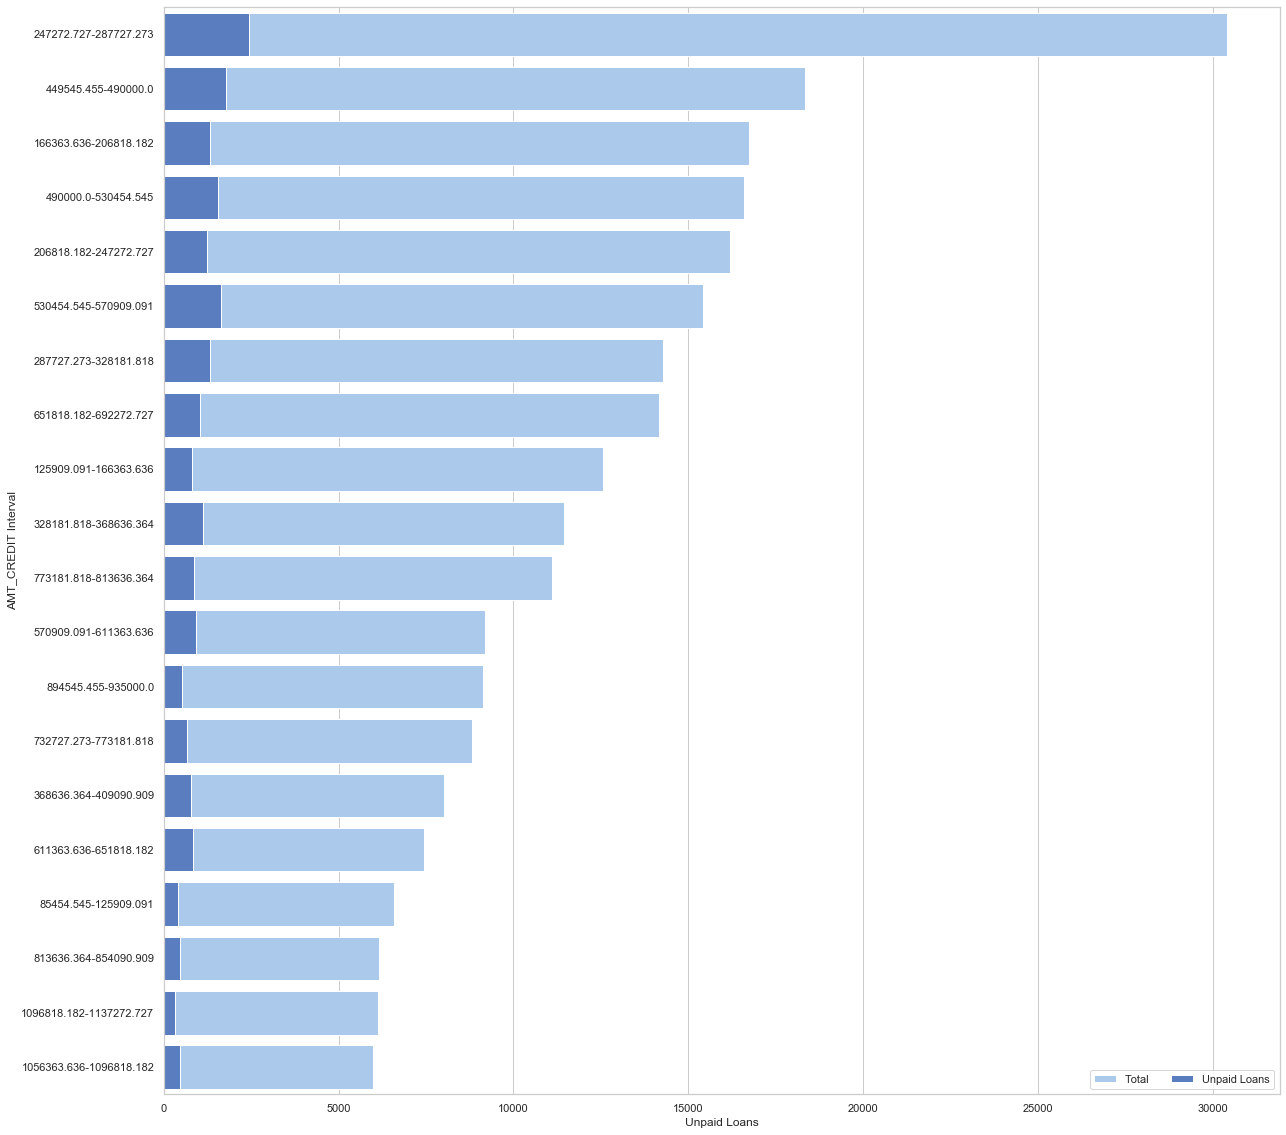

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total Loans", y="AMT_CREDIT Interval", data=topLoanIntervalsAsPerCredit,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Unpaid Loans", y="AMT_CREDIT Interval", data=topLoanIntervalsAsPerCredit,
            label="Unpaid Loans", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)